    exnode 5. play rock scissor paper      
         
    1. 절차 
        0) package loding
        1) 데이터 준비 : 조원들과 함께 가위,바위,보의 이미지를 합동으로 만들었다.
          . 이미지 : 2100장( 1명당 300장의 이미지 작성*7명 )
            ..데이터분리 : train, test 분리 
              ... train(1800장) : /aiffel/rock_scissor_paper/220930_exnode_5/scissors(rock,paper)
              ... test(300장)   : /aiffel/rock_scissor_paper/220930_exnode_5/test/scissors(rock,paper)   
        2) 데이터 사이즈 변경 : train , test
          . data 확인 : 이미지확인 , data 전처리 실시(정규화)
        3) 모델설계하기 : Conv2D, MaxPooling2D, Flatten, Dense
          . Conv2D
          . MaxPooling2D
          . Flatten
          . Dense
        4) 모델 학습 
          . 네트워크 입력형태 만들기
          . 학습시키기
        5) test data 준비
        6) 성능확인 
          . 예측한 값과 실제 값 확인
          . 데이터로 확인
          . model이 추론해 낸 이미지와 실제 라벨의 값이 다른 경우
         7) 이미지 분류기 모델에 대한 그래프
          
    2. 결론 & 배운점
        1) 이미지 분류기 모델이 성공적으로 만들어졌는가?
        2) 오버피팅을 극복하기 위한 적절한 시도가 있었는가?  
           - DATA의 양을 늘림 ( 300 -> 2100 )
           - train data 분할시 : 1) train data :정규화 
                                 2) random으로 추출
           - test data 생성시  : 1) test data :정규화
        3) 분류모델의 test accuracy가 기준 이상 높게 나왔는가?
           - 62% 유지
        4) 배운점 
           - Data측면 : 
             . Data 수집방법을 익히게 되었고 데이터량의 증가가 오버피팅 극복을 알게 되었슴.
             . train, test data의 정규화와 랜덤화 방법을 재확인 
           - model 측면 
             . hyper parameter 의 변화에 따른 손실함수 감소를 알게 되었슴
             . 최적의 파라메타를 찾기위한 시도 및 최적 파라메타 확인 
           - 혼란스러웠던 점 
             . 동일 모델, 동일 parameter로 동일 test data 확인 했을 때 변화되는 손실값, 정확도 (동일해야 되는데 왜?)         
           

In [1]:
#0) package loding
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
from sklearn.model_selection import train_test_split
import os

In [2]:
#2-1 데이터 사이즈 변경 : 가위 (이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

600  images to be resized.
600  images resized.
가위 이미지 resize 완료!


In [3]:
#2-2 데이터 사이즈 변경 : 바위 (이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

600  images to be resized.
600  images resized.
바위 이미지 resize 완료!


In [4]:
#2-3 데이터 사이즈 변경 : 보 ( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

600  images to be resized.
600  images resized.
보 이미지 resize 완료!


In [5]:
#2-4) 데이터 분리 
def load_data(img_path, number_of_data=1800):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'): 
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5"

(X_train, y_train) =load_data(image_dir_path)
x_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화
X_train, X_validation, y_train, y_validation = train_test_split(x_train_norm,
                                                                y_train,
                                                                test_size=300/1800,
                                                                random_state=15)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_validation shape: {}".format(X_validation.shape))
print("y_validation shape: {}".format(y_validation.shape))

학습데이터(x_train)의 이미지 개수는 1800 입니다.
X_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)
X_validation shape: (300, 28, 28, 3)
y_validation shape: (300,)


라벨:  0


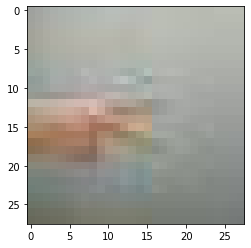

In [6]:
plt.imshow(X_train [0])
print('라벨: ', y_train[0])

In [9]:
#3) 모델설계하기
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [11]:
#4-1) 모델 학습 : 학습시키기
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=n_train_epoch)

Epoch 1/20
47/47 [==============================] - 3s 5ms/step - loss: 1.1023 - accuracy: 0.3347
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 1.0858 - accuracy: 0.4107
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 1.0139 - accuracy: 0.5127
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.9157 - accuracy: 0.5840
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 0.8289 - accuracy: 0.6253
Epoch 6/20
47/47 [==============================] - 0s 3ms/step - loss: 0.7695 - accuracy: 0.6640
Epoch 7/20
47/47 [==============================] - 0s 3ms/step - loss: 0.7428 - accuracy: 0.6693
Epoch 8/20
47/47 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.6867
Epoch 9/20
47/47 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.7173
Epoch 10/20
47/47 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.7120
Epoch 11/20
47/47 [

In [12]:
#7-1) 모델 그래프
#hist = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_validation, y_validation))
hist = model.fit(X_train, y_train, epochs=100,  validation_data=(X_validation, y_validation))
#model.fit(X_train, y_train, epochs=n_train_epoch)

Epoch 1/100
47/47 [==============================] - 0s 7ms/step - loss: 0.3678 - accuracy: 0.8673 - val_loss: 0.3876 - val_accuracy: 0.8600
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.8553 - val_loss: 0.4195 - val_accuracy: 0.8467
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.8633 - val_loss: 0.3687 - val_accuracy: 0.8600
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8733 - val_loss: 0.3827 - val_accuracy: 0.8400
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8813 - val_loss: 0.3816 - val_accuracy: 0.8433
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.8987 - val_loss: 0.3395 - val_accuracy: 0.8700
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.9033 - val_loss: 0.3331 - val_accuracy: 0.8700
Epoch 8/100
4

Epoch 59/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3369 - val_accuracy: 0.9067
Epoch 60/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.3278 - val_accuracy: 0.9000
Epoch 61/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.3417 - val_accuracy: 0.8900
Epoch 62/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.3435 - val_accuracy: 0.8967
Epoch 63/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3373 - val_accuracy: 0.8933
Epoch 64/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.3467 - val_accuracy: 0.8800
Epoch 65/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.3482 - val_accuracy: 0.9000
Epoch 

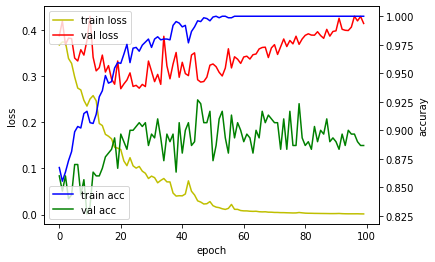

In [13]:
#7-2) 모델 그래프
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [145]:
#검증
test_loss, test_accuracy = model.evaluate(X_validation, y_validation, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.2770 - accuracy: 0.9067
test_loss: 0.27697715163230896 
test_accuracy: 0.9066666960716248


In [146]:
#5) 성능확인 .. test data 준비 .. 가위 ( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")
    #print(images.shape)
    # 파일마다 모두 28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [147]:
#5) 성능확인 .. test data 준비 .. 바위 ( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28,28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [148]:
#5) 성능확인 .. test data 준비 .. 보( 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 112,112사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [149]:
#5) 성능확인 .. test data 통합
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("평가데이터(x-test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/220930_exnode_5/test"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

평가데이터(x-test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [150]:
#6) 성능확인
#6-1) test data로 점수
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


10/10 - 0s - loss: 1.1052 - accuracy: 0.6333
test_loss: 1.1052086353302002 
test_accuracy: 0.6333333253860474


In [151]:
#7) 그래프

In [152]:
#6) 성능확인
#6-2) 추론한 값들 확인 
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [5.2697349e-01 4.7293952e-01 8.7004868e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


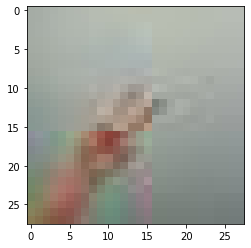

In [153]:
#6) 성능확인
#6-3) - 데이타로 확인 
plt.imshow(x_test_norm[idx],cmap=plt.cm.binary)
plt.show()

In [154]:
#6) 성능확인
#6-4)  model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우
import random

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


예측확률분포: [0.80947506 0.01505597 0.17546897]
라벨: 2, 예측결과: 0


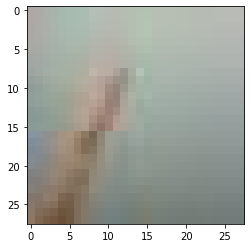

예측확률분포: [3.6130931e-08 4.2261587e-07 9.9999952e-01]
라벨: 1, 예측결과: 2


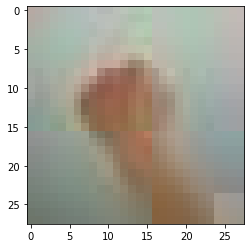

예측확률분포: [0.03136821 0.13238315 0.83624864]
라벨: 1, 예측결과: 2


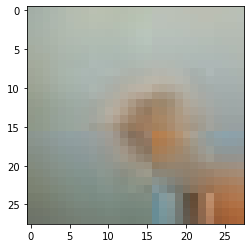

예측확률분포: [0.71277916 0.18624552 0.10097536]
라벨: 1, 예측결과: 0


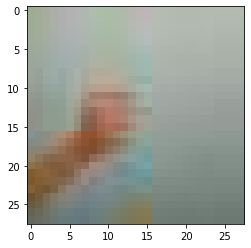

예측확률분포: [3.1107697e-01 6.8830359e-01 6.1939051e-04]
라벨: 0, 예측결과: 1


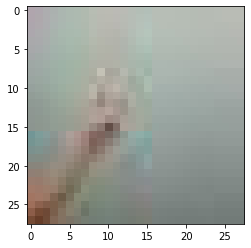

test_accuracy: 0.6333333253860474
After Reshape - x_test shape: (300, 28, 28, 3)


In [155]:
#6) 성능확인
#6-5)  model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test_norm[n], cmap=plt.cm.binary)
    plt.show()
print(f"test_accuracy: {test_accuracy}")
print(f"After Reshape - x_test shape: {x_test_norm.shape}")


In [173]:
#7-1) 모델 그래프
#hist = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_validation, y_validation))
#hist = model.fit(X_train, y_train, epochs=100,  validation_data=(X_validation, y_validation))
model.fit(X_train, y_train, epochs=n_train_epoch)


Epoch 1/20
47/47 [==============================] - 0s 3ms/step - loss: 2.2324e-07 - accuracy: 1.0000
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 2.1776e-07 - accuracy: 1.0000
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 2.1235e-07 - accuracy: 1.0000
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 2.0599e-07 - accuracy: 1.0000
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 2.0146e-07 - accuracy: 1.0000
Epoch 6/20
47/47 [==============================] - 0s 3ms/step - loss: 1.9797e-07 - accuracy: 1.0000
Epoch 7/20
47/47 [==============================] - 0s 3ms/step - loss: 1.9272e-07 - accuracy: 1.0000
Epoch 8/20
47/47 [==============================] - 0s 3ms/step - loss: 1.8843e-07 - accuracy: 1.0000
Epoch 9/20
47/47 [==============================] - 0s 3ms/step - loss: 1.8438e-07 - accuracy: 1.0000
Epoch 10/20
47/47 [==============================] - 0s 3ms/step - loss: 1.8112e-0

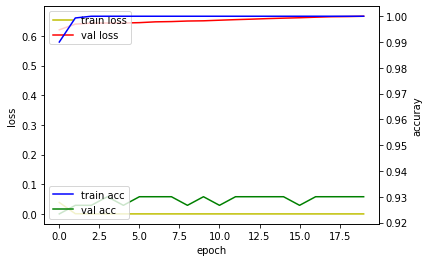

In [170]:
#7-2) 모델 그래프
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()